In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
def resize_gray(path):
    for num,files in enumerate(os.listdir(path)):
        img = cv2.imread(path+files)
        new_img = cv2.resize(img,(56,56))
        cvt_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2GRAY)
        cv2.imwrite("train/train"+str(num+1)+".jpg",cvt_img)

In [3]:
def data(path):
    images = []
    for x in sorted(os.listdir('train/'),key = lambda x:int(x.split('.')[0][5:])):
        img = cv2.imread(path+"/"+x, cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images = np.array(images)
    return images

In [4]:
# resize_gray("train(data)/")
images = data("train/")
images.shape

(140, 56, 56)

In [5]:
(a,b,c) = images.shape
x = images.reshape(a,-1)
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
y = np.load("y.npy")
y.shape

(140,)

In [7]:
classes = ['big_aeon','central','freso','TF']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [9]:
pca = PCA(svd_solver = 'randomized')
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

Variance and Principal Components in PCA

In [10]:
variance = pca.explained_variance_ratio_
variance = np.round(variance*100)

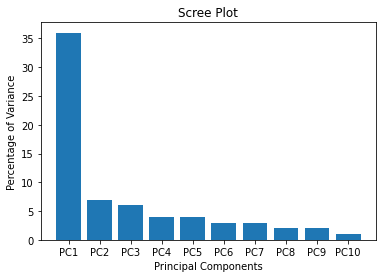

In [11]:
#only view the first 10 principal components
label = ['PC' + str(x+1) for x in range(len(variance)-102)]
plt.bar(label,variance[:10])
plt.ylabel('Percentage of Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

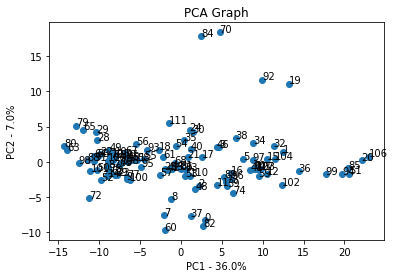

In [12]:
pca_df = pd.DataFrame(pca_x_train, columns=['PC' + str(x+1) for x in range(len(variance))])
# view in the 2d graph and see the pattern of the data after dimentionality reduction
# since PC1 already contained the highest variance
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(variance[0]))
plt.ylabel('PC2 - {0}%'.format(variance[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.iloc[sample], pca_df.PC2.iloc[sample]))

plt.show()

Visualize the components

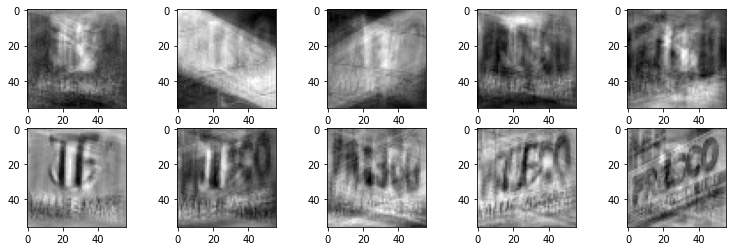

In [13]:
eigenimages = pca.components_
plt.figure(figsize = (13,4))
# visualize the first 10 components 
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    eigenimages = eigenimages.reshape(len(eigenimages),56,56)
    plt.imshow(eigenimages[i][:,:],cmap = plt.get_cmap("gray"))
    
plt.show()

In [14]:
model = SVC(kernel = 'rbf' ,C = 3 , verbose = 1)
model.fit(pca_x_train,y_train)

[LibSVM]

SVC(C=3, verbose=1)

In [15]:
model.score(pca_x_test,y_test)

1.0

In [16]:
predictions = model.predict(pca_x_test)
predictions

array([0, 0, 2, 1, 2, 3, 1, 1, 2, 2, 1, 0, 2, 1, 3, 0, 0, 2, 1, 0, 2, 1,
       1, 1, 2, 2, 0, 0])

In [17]:
test = "all/Jack Lee Lik Jie/Week 1/Night (Left).jpg"
test = cv2.imread(test)
test = cv2.resize(test,(56,56))
cvt_img = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
cvt_img = cvt_img.flatten()
cvt_img.shape

(3136,)

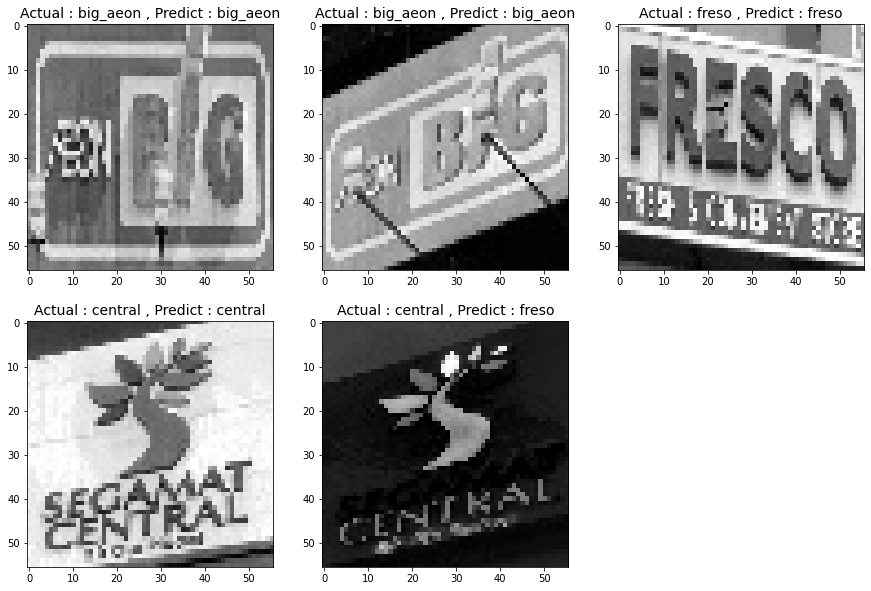

In [20]:
plt.figure(figsize = (15,10))
for index,(image,output) in enumerate(zip(x_test[0:5],y_test)):
    plt.subplot(2,3,index+1)
    plt.imshow(np.resize(image,(56,56)) , cmap = plt.get_cmap('gray'))
    plt.title("Actual : {} , Predict : {}".format(classes[output],classes[predictions[index]]),fontsize=14)

In [164]:
pickle.dump(model,open("svm.h5", 'wb'))

In [166]:
a = pickle.load(open("svm.h5",'rb'))